In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

In [4]:
tables = ['probka.csv', 'Al.csv', 'Pb.csv', 'Fe.csv']
names = ['Пробка', 'Алюминий', 'Свинец', 'Железо']

layer_length_table = pd.read_csv("material_len.csv")
layer_length = {key: val for key, val in zip(names, layer_length_table['len'])}

Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)
Axes(0.547727,0.11;0.352273x0.35)


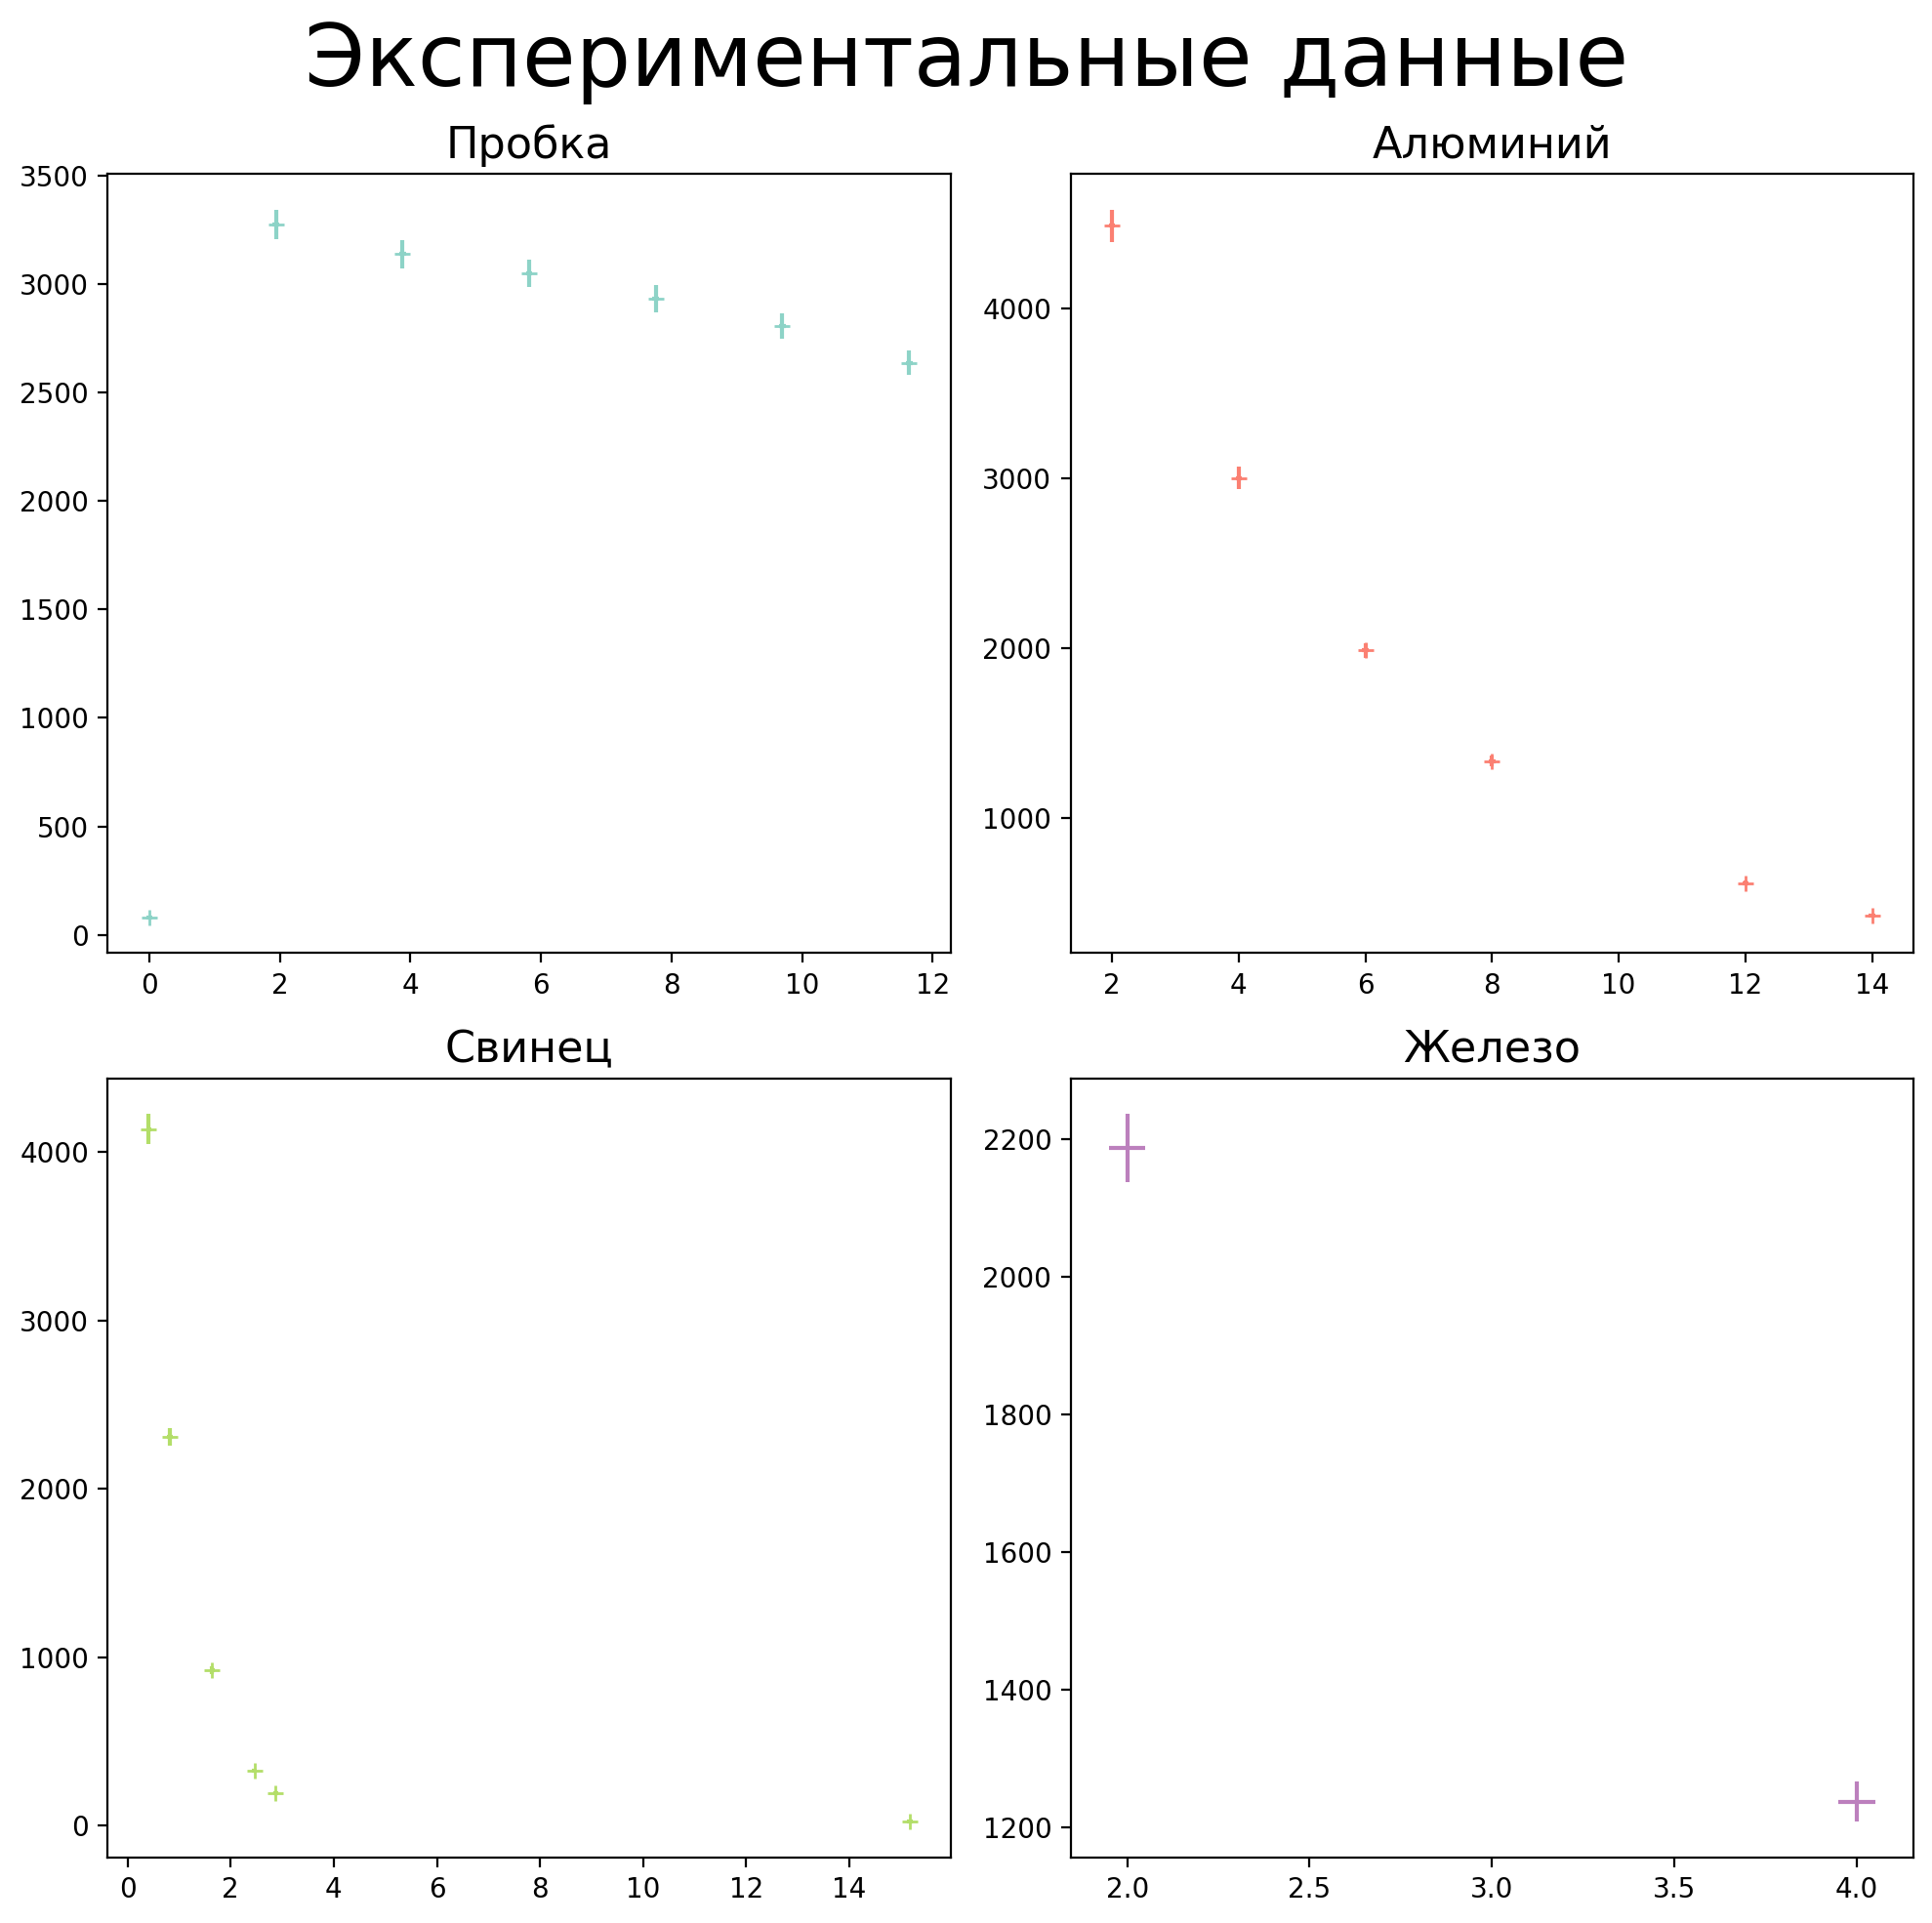

In [26]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10), dpi = 200)
color_values = np.arange(0, 2, 0.25)
for plotable, color_interp, color_dots, name, table_name in zip(ax.ravel(), 
                                                                cm.Set2(color_values), 
                                                                cm.Set3(color_values), 
                                                                names, 
                                                                tables):
    plotable.set_title(name, fontsize = 16)
    print(plotable)
    data = pd.read_csv(table_name)
    material_l = data['layers'] * layer_length[name]
    count = data['N'] / (data['t'] * 60)
    count_error = np.sqrt(data['N']) / (data['t'] * 60)
    count_error += 0.02 * data['N'] / (data['t'] * 60)
    xerr = [0.05 for _ in data['layers']]
    plotable.errorbar(material_l, 
                      count, 
                      color = color_dots, 
                      yerr = count_error, 
                      fmt = '+',
                      xerr = xerr)
    

fig.suptitle("Экспериментальные данные", fontsize = 32)
fig.tight_layout()